# Exploring the bias

In [1]:
# imports
""" Routines to analyze patches """
import numpy as np
import os

import h5py

import pandas

import seaborn as sns

# Files

In [2]:
preproc_path = os.path.join(os.getenv('OS_AI'), 'MAE', 'PreProc')
recon_path = os.path.join(os.getenv('OS_AI'), 'MAE', 'Recon')
orig_file = os.path.join(preproc_path, 'MAE_LLC_valid_nonoise_preproc.h5')
recon_file = os.path.join(recon_path, 'mae_reconstruct_t75_p10.h5')
mask_file = os.path.join(recon_path, 'mae_mask_t75_p10.h5')

# Measure the bias

In [3]:
# Load up images
f_orig = h5py.File(orig_file, 'r')
f_recon = h5py.File(recon_file, 'r')
f_mask = h5py.File(mask_file, 'r')

median_biases = []
mean_biases = []
for idx in range(10000):
    orig_img = f_orig['valid'][idx,0,...]
    recon_img = f_recon['valid'][idx,0,...]
    mask_img = f_mask['valid'][idx,0,...]

    diff_true = recon_img - orig_img 

    median_bias = np.median(diff_true[np.abs(diff_true) > 0.])
    mean_bias = np.mean(diff_true[np.abs(diff_true) > 0.])
    #mean_img = np.mean(orig_img[np.isclose(mask_img,0.)])
    # Save
    median_biases.append(median_bias)
    mean_biases.append(mean_bias)

# Stats

In [4]:
df = pandas.DataFrame({'median_bias': median_biases,
                       'mean_bias': mean_biases})

In [5]:
df

,median_bias,mean_bias
0,0.038407,0.038477
1,0.031939,0.031265
2,0.027058,0.025236
3,0.042688,0.043436
4,0.048007,0.047166
...,...,...
9995,0.021377,0.023236
9996,0.018002,0.019443
9997,0.029167,0.029377
9998,0.027276,0.027246


# Plots

(-0.1, 0.1)

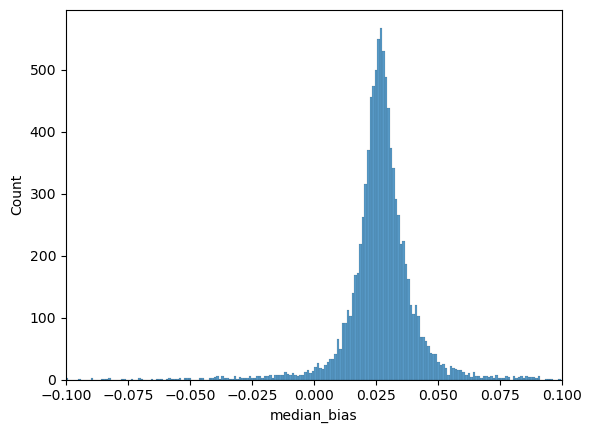

In [6]:
ax = sns.histplot(df, x='median_bias')
ax.set_xlim(-0.1, 0.1)

## Corrected

In [7]:
df['corrected'] = df.median_bias - np.median(df.median_bias)

(-0.1, 0.1)

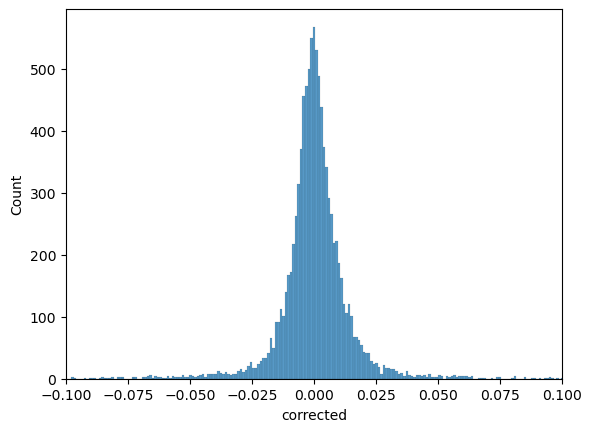

In [8]:
ax = sns.histplot(df, x='corrected')
ax.set_xlim(-0.1, 0.1)

In [9]:
np.std(df.corrected)

0.01863315887749195

In [10]:
np.argmax(df.median_bias)

663

# All values

In [11]:
df2 = pandas.DataFrame({'values': f_orig['valid'][0:1000,0,...].flatten()})

In [12]:
df2

,values
0,-0.219200
1,-0.222333
2,-0.228568
3,-0.228154
4,-0.219143
...,...
4095995,1.020094
4095996,1.016069
4095997,1.013470
4095998,1.012602


(-2.5, 2.5)

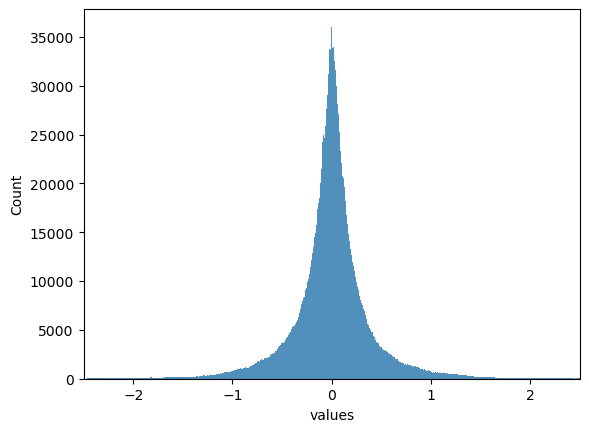

In [13]:
ax = sns.histplot(df2, x='values')
ax.set_xlim(-2.5, 2.5)

# Another example

In [14]:
preproc_path = os.path.join(os.getenv('OS_AI'), 'MAE', 'PreProc')
recon_path = os.path.join(os.getenv('OS_AI'), 'MAE', 'Recon')
orig_file = os.path.join(preproc_path, 'MAE_LLC_valid_nonoise_preproc.h5')
recon_file = os.path.join(recon_path, 'mae_reconstruct_t75_p50.h5')
mask_file = os.path.join(recon_path, 'mae_mask_t75_p50.h5')

In [15]:
# Load up images
f_orig = h5py.File(orig_file, 'r')
f_recon = h5py.File(recon_file, 'r')
f_mask = h5py.File(mask_file, 'r')

median_biases = []
mean_biases = []
for idx in range(10000):
    orig_img = f_orig['valid'][idx,0,...]
    recon_img = f_recon['valid'][idx,0,...]
    mask_img = f_mask['valid'][idx,0,...]

    diff_true = recon_img - orig_img 

    median_bias = np.median(diff_true[np.abs(diff_true) > 0.])
    mean_bias = np.mean(diff_true[np.abs(diff_true) > 0.])
    #mean_img = np.mean(orig_img[np.isclose(mask_img,0.)])
    # Save
    median_biases.append(median_bias)
    mean_biases.append(mean_bias)

In [16]:
df_t75_p50 = pandas.DataFrame({'median_bias': median_biases,
                       'mean_bias': mean_biases})

(-0.1, 0.1)

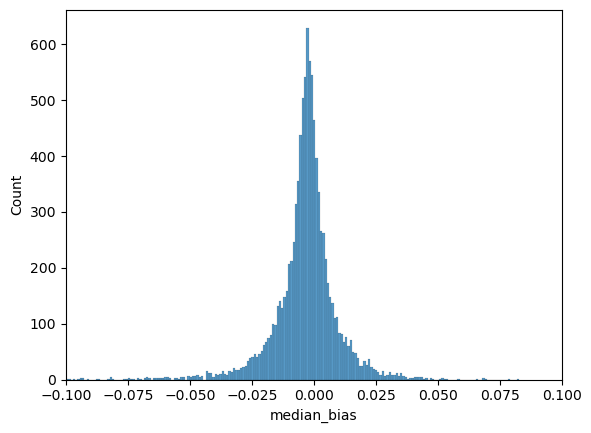

In [17]:
ax = sns.histplot(df_t75_p50, x='median_bias')
ax.set_xlim(-0.1, 0.1)